In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the IRIS Dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# Initializing the dataframe
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Adding the feature names to the dataframe
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Adding target variable to dataframe
df['Species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
# to display stats about data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# to display no. of samples on each class
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [ ]:
# check for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

# decision tree

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# print metric to get performance
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_dt = accuracy_score(y_test,y_pred)*100
acc_dt = model.score(x_test, y_test) * 100
print(cm)
print(accuracy_dt)
print(acc_dt)

[[14  0  0]
 [ 0 18  2]
 [ 0  0 11]]
95.55555555555556
95.55555555555556


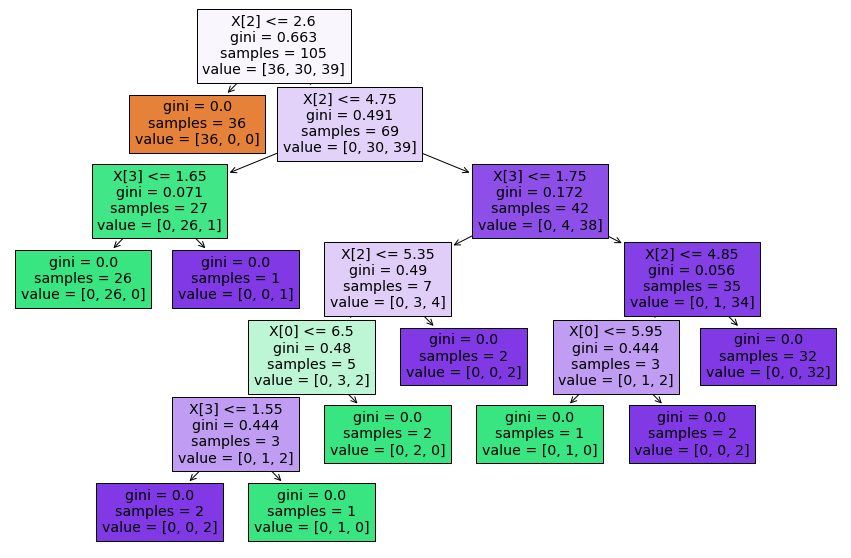

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(model.fit(x_train, y_train)  ,filled=True)
plt.show()

# logistic regression

In [ ]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# model training
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# print metric to get performance
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_lr = accuracy_score(y_test,y_pred)*100
acc_lr = model.score(x_test, y_test) * 100
print(cm)
print(accuracy_lr)
print(acc_lr)

[[14  0  0]
 [ 0 19  1]
 [ 0  0 11]]
97.77777777777777
97.77777777777777


# knn - k-nearest neighbours

In [ ]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# print metric to get performance
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_knn = accuracy_score(y_test,y_pred)*100
acc_knn = model.score(x_test, y_test) * 100
print(cm)
print(accuracy_knn)
print(acc_knn)

[[14  0  0]
 [ 0 19  1]
 [ 0  0 11]]
97.77777777777777
97.77777777777777


# Naïve Bayes Classifier

In [ ]:
#Naïve Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# print metric to get performance
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_nb = accuracy_score(y_test,y_pred)*100
acc_nb = model.score(x_test, y_test) * 100
print(cm)
print(accuracy_nb)
print(acc_nb)

[[14  0  0]
 [ 0 20  0]
 [ 0  0 11]]
100.0
100.0


#SVM-LINEAR

In [ ]:
#SVM-LINEAR
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 0)
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# print metric to get performance
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_svml = accuracy_score(y_test,y_pred)*100
acc_svml = model.score(x_test, y_test) * 100
print(cm)
print(accuracy_svml)
print(acc_svml)

[[14  0  0]
 [ 0 19  1]
 [ 0  0 11]]
97.77777777777777
97.77777777777777


#SVM-NON-LINEAR

In [ ]:
#SVM-NON-LINEAR
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# print metric to get performance
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_svmNl = accuracy_score(y_test,y_pred)*100
acc_svmNl = model.score(x_test, y_test) * 100
print(cm)
print(accuracy_svmNl)
print(acc_svmNl)

[[14  0  0]
 [ 0 19  1]
 [ 0  0 11]]
97.77777777777777
97.77777777777777


#RandomForestClassifier

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# print metric to get performance
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_rf = accuracy_score(y_test,y_pred)*100
acc_rf = model.score(x_test, y_test) * 100
print(cm)
print(accuracy_rf)
print(acc_rf)

[[14  0  0]
 [ 0 19  1]
 [ 0  0 11]]
97.77777777777777
97.77777777777777


#AdaBoostClassifier

In [ ]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

In [ ]:
# print metric to get performance
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_abc = accuracy_score(y_test,y_pred)*100
acc_abc = model.score(x_test, y_test) * 100
print(cm)
print(accuracy_abc)
print(acc_abc)

[[14  0  0]
 [ 0 20  0]
 [ 0  0 11]]
100.0
100.0


#Logistic Regression model and apply PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(x_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# print metric to get performance
y_pred = model.predict(x_test_pca)
cm = confusion_matrix(y_test, y_pred)
accuracy_lrpca = accuracy_score(y_test,y_pred)*100
acc_lrpca = model.score(x_test_pca, y_test) * 100
print(cm)
print(accuracy_lrpca)
print(acc_lrpca)

[[14  0  0]
 [ 0 19  1]
 [ 0  0 11]]
97.77777777777777
97.77777777777777


In [ ]:
# Compare results
results = pd.DataFrame({
    'Model': [ 'Decision Tree Classifier', 
              'Logistic Regression', 
              'Random Forest',
              'Naive Bayes',  
              ' Support Vector Machine Linear', 
              'Support Vector Machine Non-Linear',
              'K-NN classifier',
              'Logistic Regression with PCA',
              'Ada Boost Model'],
    'Score': [ acc_dt,
              acc_lr, 
              acc_rf,
              acc_nb,  
              acc_svml,
              acc_svmNl,
              acc_knn,
              acc_lrpca,
              acc_abc],
    "Accuracy_score":[accuracy_dt,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svml,
                      accuracy_svmNl,
                      accuracy_knn,
                      accuracy_lrpca,
                      accuracy_abc
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Naive Bayes,100.000000,100.000000
1,Ada Boost Model,100.000000,100.000000
2,Logistic Regression,97.777778,97.777778
3,Random Forest,97.777778,97.777778
4,Support Vector Machine Linear,97.777778,97.777778
5,Support Vector Machine Non-Linear,97.777778,97.777778
6,K-NN classifier,97.777778,97.777778
7,Logistic Regression with PCA,97.777778,97.777778
8,Decision Tree Classifier,95.555556,95.555556
